In [441]:
import pandas as pd

In [442]:
df = pd.read_csv('/Users/daniilfenev/Desktop/УЧЕБА/Датасеты с кагла/титаник/titanic/train.csv')

In [443]:
df.shape

(891, 12)

In [444]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [446]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [447]:
cabin_null_percent = round(df['Cabin'].isnull().sum()/len(df) * 100, 2)
age_null_percent = round(df['Age'].isnull().sum()/len(df) * 100, 2)
print(cabin_null_percent)
print(age_null_percent)

77.1
19.87


Как мы видим, процент пропущенных по номеру места слишком большой. Делаем вывод, что убираем данную колонку из Дата сета.

In [448]:
df.drop(columns='Cabin', inplace=True)

In [449]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [450]:
print(df.groupby(['Sex', 'Pclass'])['Age'].median())

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64


In [451]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

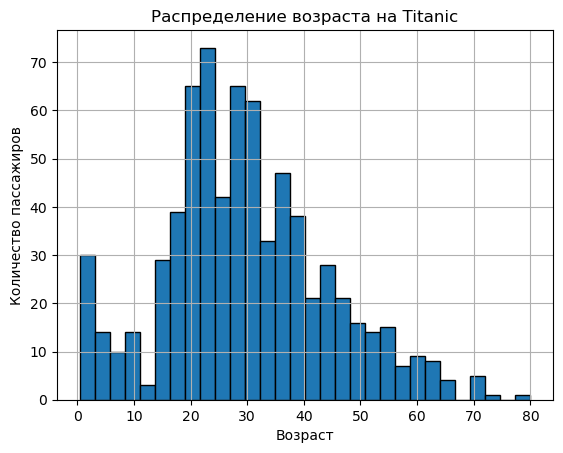

In [452]:
import matplotlib.pyplot as plt

df['Age'].hist(bins=30, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста на Titanic')
plt.show()

In [453]:
df['Age'] = df['Age'].fillna(df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))

Заменили пропущенные значения возраста каждого пассажира на медианные значения возраста пассажиров сгруппированных по полу и по классу.

In [454]:
df['Age'] = df['Age'].astype('int')

In [455]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [457]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [458]:
df = df.dropna()

In [529]:
df['Embarked'].isnull().sum()

0

In [460]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [461]:
avg_price_class = df.groupby(['Pclass', 'Embarked'])['Fare'].mean().round(2)
print(avg_price_class)

Pclass  Embarked
1       C           104.72
        Q            90.00
        S            70.36
2       C            25.36
        Q            12.35
        S            20.33
3       C            11.21
        Q            11.18
        S            14.64
Name: Fare, dtype: float64


In [462]:
df.loc[:, 'Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [463]:
df['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: object

In [464]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [465]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,0


In [466]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [467]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0


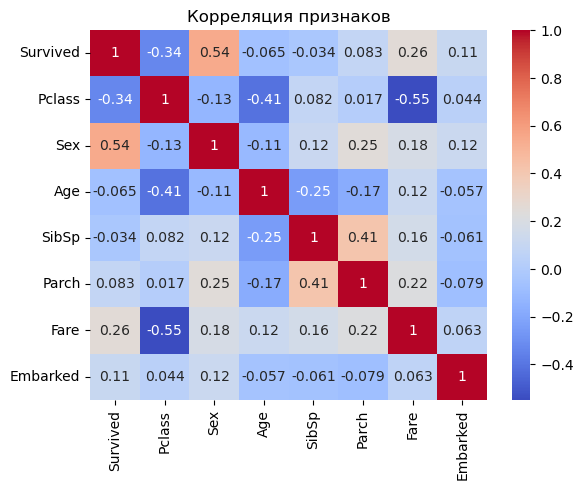

In [468]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

In [469]:
bins = [0, 18, 50, float('inf')]
labels = ['ChildOrTeen', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [470]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,0,22,1,0,7.2500,0,Adult
1,1,1,1,38,1,0,71.2833,1,Adult
2,1,3,1,26,0,0,7.9250,0,Adult
3,1,1,1,35,1,0,53.1000,0,Adult
4,0,3,0,35,0,0,8.0500,0,Adult
5,0,3,0,25,0,0,8.4583,2,Adult
6,0,1,0,54,0,0,51.8625,0,Senior
7,0,3,0,2,3,1,21.0750,0,ChildOrTeen
8,1,3,1,27,0,2,11.1333,0,Adult
9,1,2,1,14,1,0,30.0708,1,ChildOrTeen


In [471]:
df = pd.get_dummies(df, columns=['AgeGroup'], prefix='Age')

In [472]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_ChildOrTeen,Age_Adult,Age_Senior
0,0,3,0,22,1,0,7.2500,0,False,True,False
1,1,1,1,38,1,0,71.2833,1,False,True,False
2,1,3,1,26,0,0,7.9250,0,False,True,False
3,1,1,1,35,1,0,53.1000,0,False,True,False
4,0,3,0,35,0,0,8.0500,0,False,True,False


In [473]:
df.drop(columns=['SibSp', 'Parch'], inplace=True)

In [474]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_ChildOrTeen,Age_Adult,Age_Senior
0,0,3,0,22,7.2500,0,False,True,False
1,1,1,1,38,71.2833,1,False,True,False
2,1,3,1,26,7.9250,0,False,True,False
3,1,1,1,35,53.1000,0,False,True,False
4,0,3,0,35,8.0500,0,False,True,False


In [475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         889 non-null    int64  
 1   Pclass           889 non-null    int64  
 2   Sex              889 non-null    object 
 3   Age              889 non-null    int64  
 4   Fare             889 non-null    float64
 5   Embarked         889 non-null    int64  
 6   Age_ChildOrTeen  889 non-null    bool   
 7   Age_Adult        889 non-null    bool   
 8   Age_Senior       889 non-null    bool   
dtypes: bool(3), float64(1), int64(4), object(1)
memory usage: 51.2+ KB


In [476]:
def encode_age_group(row):
    if row['Age_ChildOrTeen']:
        return 0
    elif row['Age_Adult']:
        return 1
    elif row['Age_Senior']:
        return 2
    else:
        return -1  # если вдруг нет ни одного флага

df['AgeGroup'] = df.apply(encode_age_group, axis=1)

In [477]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Age_ChildOrTeen,Age_Adult,Age_Senior,AgeGroup
0,0,3,0,22,7.2500,0,False,True,False,1
1,1,1,1,38,71.2833,1,False,True,False,1
2,1,3,1,26,7.9250,0,False,True,False,1
3,1,1,1,35,53.1000,0,False,True,False,1
4,0,3,0,35,8.0500,0,False,True,False,1


In [478]:
df = df.drop(columns=['Age_ChildOrTeen', 'Age_Adult', 'Age_Senior'])

In [479]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeGroup
0,0,3,0,22,7.2500,0,1
1,1,1,1,38,71.2833,1,1
2,1,3,1,26,7.9250,0,1
3,1,1,1,35,53.1000,0,1
4,0,3,0,35,8.0500,0,1


In [480]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [481]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [482]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [483]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [484]:
y_pred = model.predict(X_test)

In [485]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [486]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.74      0.81      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



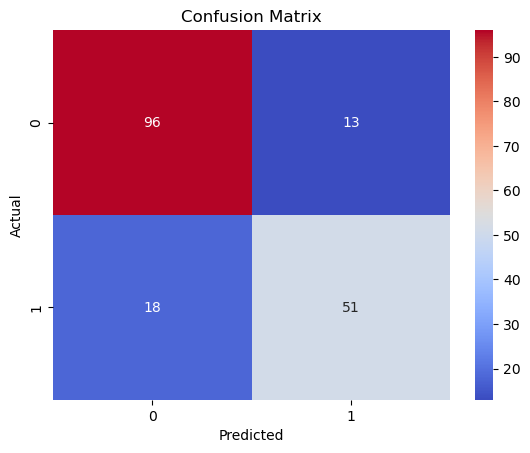

In [530]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Попробуем другие модели

In [488]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = [
    LogisticRegression(max_iter=1000),
    SVC(),
    KNeighborsClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(model.__class__.__name__, "Accuracy:", round(acc, 2))

LogisticRegression Accuracy: 0.79
SVC Accuracy: 0.67
KNeighborsClassifier Accuracy: 0.72


In [489]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.78651685 0.81460674 0.85393258 0.78651685 0.83050847]
Average score: 0.8144163016568273


In [490]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

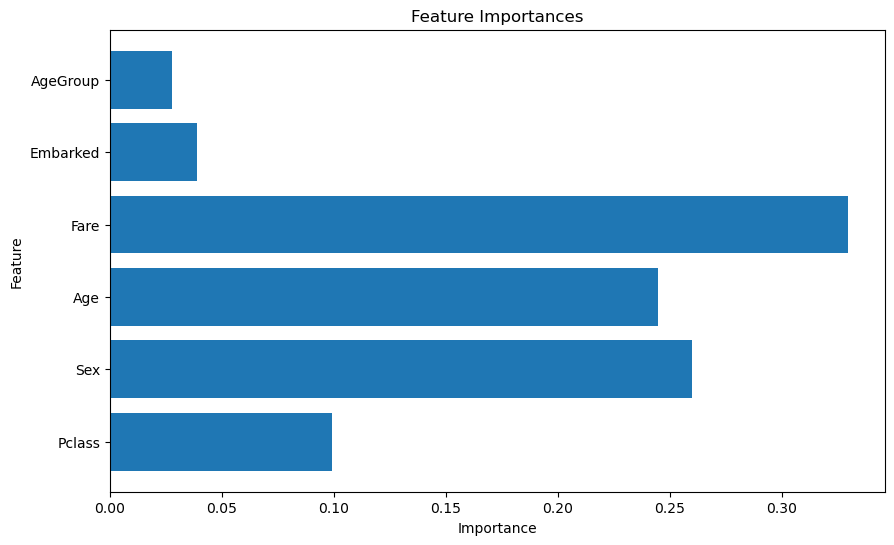

In [491]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

In [492]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Сетка параметров, которую будем перебирать:
param_grid = {
    'n_estimators': [50, 100, 200],              # количество деревьев
    'max_depth': [None, 5, 10, 20],              # максимальная глубина дерева
    'min_samples_split': [2, 5, 10],             # минимальное количество объектов для деления
    'max_features': ['sqrt', 'log2']             # стратегия выбора признаков
}

# Базовая модель
rf = RandomForestClassifier(random_state=42)

# Grid Search с 5-кратной кросс-валидацией
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,       # использовать все ядра процессора
    verbose=1        # показывать прогресс
)

# Обучение
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (средняя по CV):", round(grid_search.best_score_, 4))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Лучшие параметры: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
Лучшая точность (средняя по CV): 0.834


In [493]:
# Обучаем модель с лучшими параметрами
best_model = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_split=10,
    n_estimators=50,
    random_state=42
)

best_model.fit(X_train, y_train)

# Предсказания и метрики
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy на тесте:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy на тесте: 0.8258426966292135
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.80      0.74      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



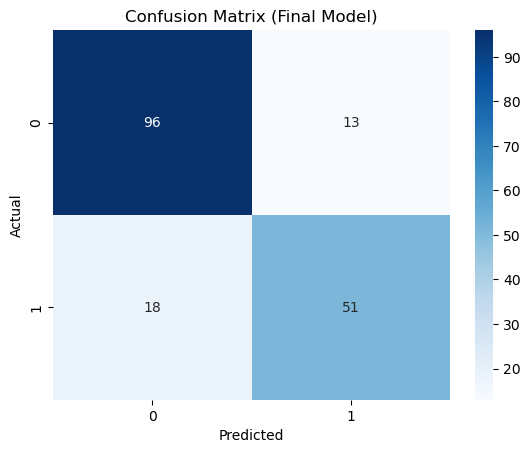

In [494]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Final Model)')
plt.show()

In [495]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Модели:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [496]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeGroup
0,0,3,0,22,7.2500,0,1
1,1,1,1,38,71.2833,1,1
2,1,3,1,26,7.9250,0,1
3,1,1,1,35,53.1000,0,1
4,0,3,0,35,8.0500,0,1


XGBoost

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    int64  
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    int64  
 6   AgeGroup  889 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 55.6+ KB


In [498]:
df['Sex'] = df['Sex'].astype(int)

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    int64  
 4   Fare      889 non-null    float64
 5   Embarked  889 non-null    int64  
 6   AgeGroup  889 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 55.6 KB


In [500]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [501]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8314606741573034
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       109
           1       0.79      0.77      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/var/folders/sy/qywmg1tx3rj_jtsf582d3wj00000gn/T/ipykernel_13948/4125923204.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='Blues_d')


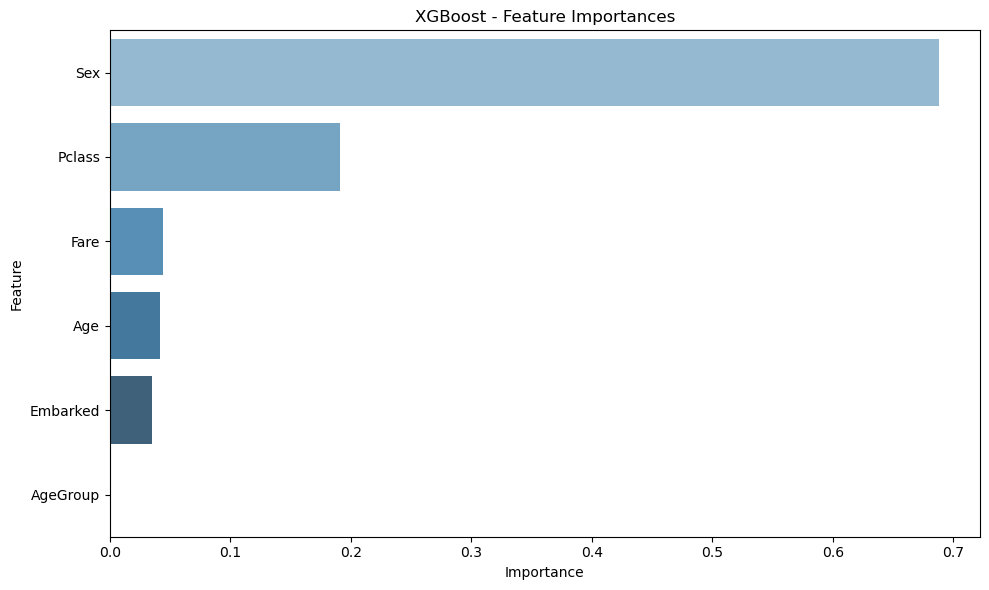

In [502]:
import matplotlib.pyplot as plt
import seaborn as sns

# Получаем важности признаков
importances = xgb_model.feature_importances_
features = X.columns

# Создаём DataFrame для наглядности
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp, palette='Blues_d')
plt.title('XGBoost - Feature Importances')
plt.tight_layout()
plt.show()

In [503]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Базовая модель
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Сетка параметров
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearch с 5-кратной кросс-валидацией
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Обучение
grid_search.fit(X_train, y_train)

# Лучшие параметры и точность
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность:", round(grid_search.best_score_, 4))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Лучшие параметры: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Лучшая точность: 0.8383


[LightGBM] [Info] Number of positive: 271, number of negative: 440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 711, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381153 -> initscore=-0.484656
[LightGBM] [Info] Start training from score -0.484656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


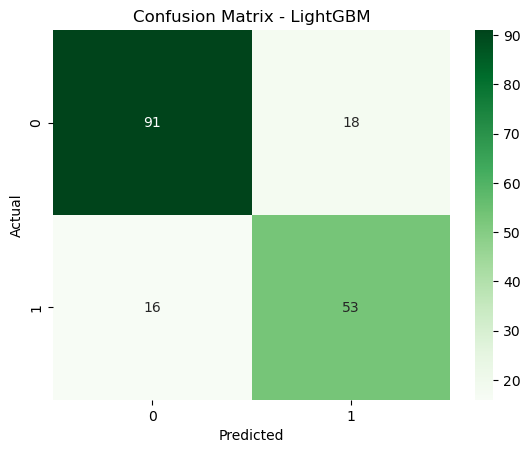

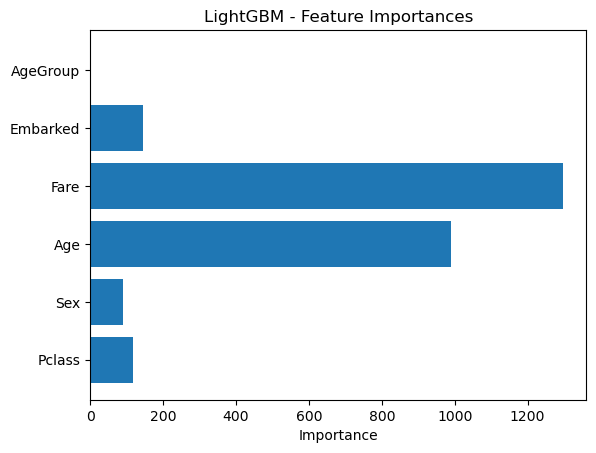

In [504]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Обучаем модель
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# Предсказания
y_pred_lgb = lgb_model.predict(X_test)

# Метрики
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Важность признаков
importances = lgb_model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.title("LightGBM - Feature Importances")
plt.xlabel("Importance")
plt.show()

CatBoost Accuracy: 0.8258426966292135
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       109
           1       0.80      0.74      0.77        69

    accuracy                           0.83       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.83      0.82       178



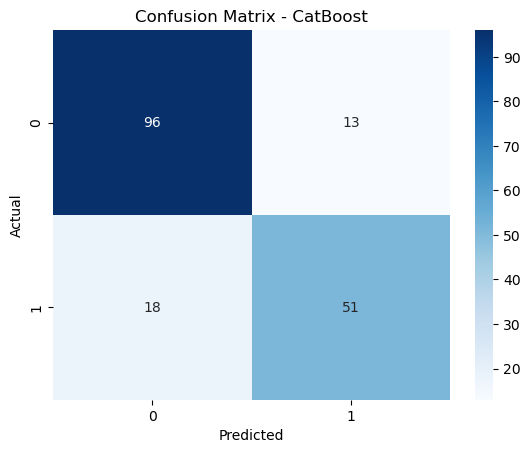

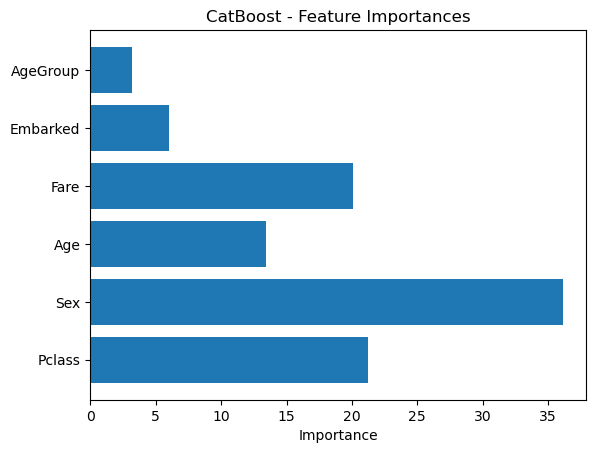

In [505]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Обучение модели
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

# Предсказания
y_pred_cat = cat_model.predict(X_test)

# Метрики
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Важность признаков
importances = cat_model.get_feature_importance()
features = X_train.columns

plt.barh(features, importances)
plt.title("CatBoost - Feature Importances")
plt.xlabel("Importance")
plt.show()

In [506]:
import joblib

# Сохраняем обученную модель
joblib.dump(xgb_model, 'xgb_titanic_model.pkl')

['xgb_titanic_model.pkl']

In [507]:
# Загрузка модели
xgb_model = joblib.load('xgb_titanic_model.pkl')

In [508]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)  # <--- обязательно

y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8314606741573034
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       109
           1       0.79      0.77      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178

[[95 14]
 [16 53]]


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:03:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [509]:
test_df = pd.read_csv('/Users/daniilfenev/Desktop/УЧЕБА/Датасеты с кагла/титаник/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [510]:
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Age'] = test_df['Age'].fillna(test_df.groupby(['Sex', 'Pclass'])['Age'].transform('median'))
test_df['Fare'].fillna(df['Fare'].median(), inplace=True)

/var/folders/sy/qywmg1tx3rj_jtsf582d3wj00000gn/T/ipykernel_13948/3619717230.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [511]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0


In [515]:
bins = [0, 18, 50, float('inf')]
labels = ['ChildOrTeen', 'Adult', 'Senior']

test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels)

In [517]:
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,Adult
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,Senior
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,Adult
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0,ChildOrTeen
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2,Adult
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0,Adult
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1,ChildOrTeen
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0,Adult


In [519]:
test_df['AgeGroup'] = test_df['AgeGroup'].map({
    'ChildOrTeen': 0,
    'Adult': 1,
    'Senior': 2
}).astype(int)

In [523]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeGroup
0,0,3,0,22,7.2500,0,1
1,1,1,1,38,71.2833,1,1
2,1,3,1,26,7.9250,0,1
3,1,1,1,35,53.1000,0,1
4,0,3,0,35,8.0500,0,1


In [522]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1


In [524]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'AgeGroup']
X_kaggle = test_df[features]

In [525]:
# Используем обученную модель XGBoost (обязательно уже обученную!)
predictions = xgb_model.predict(X_kaggle)

In [526]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions.astype(int)
})

submission.to_csv('submission.csv', index=False)

In [527]:
print(submission.head())

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [528]:
submission.to_csv('titanic_xgb_submission.csv', index=False)